In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker  as ticker
import folium
import branca
from datetime import datetime, timedelta,date
import plotly.express as px
import calmap
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D

In [37]:
f=pd.read_csv(r'E:\Dataset\raw_data (15).csv', skiprows=2)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [38]:
f.drop(f.loc[52:].index,inplace=True)
f.drop(f.head(1).index,inplace=True)
f.reset_index(drop=True,inplace=True)

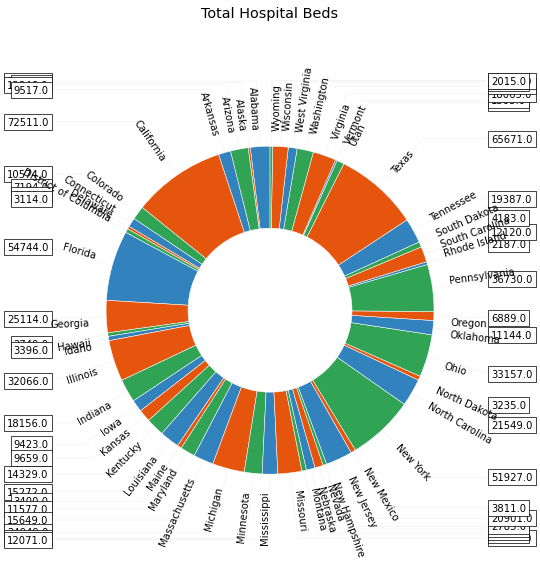

In [40]:
fig, ax = plt.subplots(figsize=(10,8),subplot_kw=dict(aspect="equal"))
res= f['Total Hospital Beds']
#vals = np.array([[60., 32.], [37., 40.], [29., 10.]])
labels = f['Location']
sizes = f['Total Hospital Beds']


cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)

wedges,texts=ax.pie(sizes,labels=labels, colors=outer_colors,startangle=90,rotatelabels=True,
        wedgeprops=dict(width=0.5, edgecolor='w'))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(res[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title('Total Hospital Beds',y=1.2)
plt.tight_layout()
plt.show()